In [ ]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15833, done.
remote: Total 15833 (delta 0), reused 0 (delta 0), pack-reused 15833
Receiving objects: 100% (15833/15833), 14.35 MiB | 20.55 MiB/s, done.
Resolving deltas: 100% (10670/10670), done.


In [ ]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [ ]:
!make

mkdir -p ./obj/
mkdir -p backup
mkdir -p results
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -rdynamic -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -fPIC -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:945:23: warning: variable ‘rgb’ set but not used []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-but-set-variable-Wunused-but-set-variable]8;;]
  945 |                 float rgb[3];
      |                       ^~~
./src/image_opencv.cpp: In function ‘void cv_draw_object(image, float*, int, int, int*, float*, int*, int, char**)’:
./src/image_opencv.cpp:1443:14: warning: unused variab

In [ ]:
!mkdir data/obj

mkdir: cannot create directory ‘data/obj’: File exists


In [ ]:
# uncomment while training

# !wget https://pjreddie.com/media/files/yolov3.weights

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [ ]:
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

 01_05_2023.mp3		      fourth_tenthmay.mp3	   second10th.mp3
 09_05_2023.tsv		      GAN			   short_18_05_2023.wav
 11thmay.mp3		      GenAI			   Short_Audio_SCI_Court_3.mp3
 18_05_2023_Short_Audio.mp3   Housing.csv		   stanford_cars.zip
 3rd_May_audio.mp3	     "Image_pdf's"		  'Supreme Court of India - Court 2.mp3'
 AML_POC		      Maximus			   TensorRT
'AML_POC (1)'		      NBME			   tokenizer.json
 bag_detec		     'NBME Data Sources'	   Transcription
'Colab Notebooks'	     'NLP - Who When Where What'   txtfiles
'Copy of ADMA_Gen_AI.gdoc'    ocr			   UP_RERA
 Demo-artifacts		      OCR.ipynb			  'YData Profiling Exec Time'
 Flask-deploy-model	      PySpark			  'YData Profiling Execution Times.gsheet'


In [ ]:
%cd darknet

/content/darknet


In [ ]:
!cp /mydrive/bag_detec/obj.zip ../

In [ ]:
!unzip ../obj.zip -d data/obj

Archive:  ../obj.zip
  inflating: data/obj/000000141882.jpg  
  inflating: data/obj/000000437613.txt  
  inflating: data/obj/000000378711.jpg  
  inflating: data/obj/000000429063.jpg  
  inflating: data/obj/000000190229.jpg  
  inflating: data/obj/000000490490.txt  
  inflating: data/obj/000000112664.txt  
  inflating: data/obj/000000105756.jpg  
  inflating: data/obj/000000546301.jpg  
  inflating: data/obj/000000548010.txt  
  inflating: data/obj/000000032105.jpg  
  inflating: data/obj/000000345009.txt  
  inflating: data/obj/000000496444.jpg  
  inflating: data/obj/000000107800.jpg  
  inflating: data/obj/000000171472.txt  
  inflating: data/obj/000000402219.jpg  
  inflating: data/obj/000000039078.jpg  
  inflating: data/obj/000000239101.txt  
  inflating: data/obj/000000380280.jpg  
  inflating: data/obj/000000233404.txt  
  inflating: data/obj/000000515854.txt  
  inflating: data/obj/000000204525.txt  
  inflating: data/obj/000000033325.txt  
  inflating: data/obj/000000314050.t

In [ ]:
!cp /mydrive/bag_detec/yolov3_custom.cfg ./cfg

In [ ]:
!cp /mydrive/bag_detec/obj.names ./data
!cp /mydrive/bag_detec/obj.data  ./data

In [ ]:
!cp /mydrive/bag_detec/generate_train.py ./

In [ ]:
!python generate_train.py

In [ ]:
!ls data/

9k.tree     eagle.jpg	 imagenet.labels.list	   obj.data	     scream.jpg
coco9k.map  giraffe.jpg  imagenet.shortnames.list  obj.names	     train.txt
coco.names  goal.txt	 labels			   openimages.names  voc.names
dog.jpg     horses.jpg	 obj			   person.jpg


In [ ]:
!cat data/train.txt

data/obj/000000473403.jpg
data/obj/000000167206.jpg
data/obj/000000238717.jpg
data/obj/000000199510.jpg
data/obj/000000059141.jpg
data/obj/000000561673.jpg
data/obj/000000120648.jpg
data/obj/000000147710.jpg
data/obj/000000578375.jpg
data/obj/000000513961.jpg
data/obj/000000210564.jpg
data/obj/000000221515.jpg
data/obj/000000049777.jpg
data/obj/000000037734.jpg
data/obj/000000082198.jpg
data/obj/000000449622.jpg
data/obj/000000384114.jpg
data/obj/000000515779.jpg
data/obj/000000107843.jpg
data/obj/000000450741.jpg
data/obj/000000256529.jpg
data/obj/000000380305.jpg
data/obj/000000036311.jpg
data/obj/000000078553.jpg
data/obj/000000127588.jpg
data/obj/000000000795.jpg
data/obj/000000216363.jpg
data/obj/000000578009.jpg
data/obj/000000482819.jpg
data/obj/000000434092.jpg
data/obj/000000445214.jpg
data/obj/000000282790.jpg
data/obj/000000466247.jpg
data/obj/000000030261.jpg
data/obj/000000089012.jpg
data/obj/000000227433.jpg
data/obj/000000039078.jpg
data/obj/000000570810.jpg
data/obj/000

In [ ]:
# !wget http://pjreddie.com/media/files/darknet53.conv.74

In [ ]:
#!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show

In [ ]:
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [ ]:
!./darknet detector test data/obj.data cfg/yolov3_custom.cfg /mydrive/bag_detec/backup/yolov3_custom_final.weights /mydrive/bag_detec/img2.jpeg

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
 0 : compute_capability = 700, cudnn_half = 0, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcut

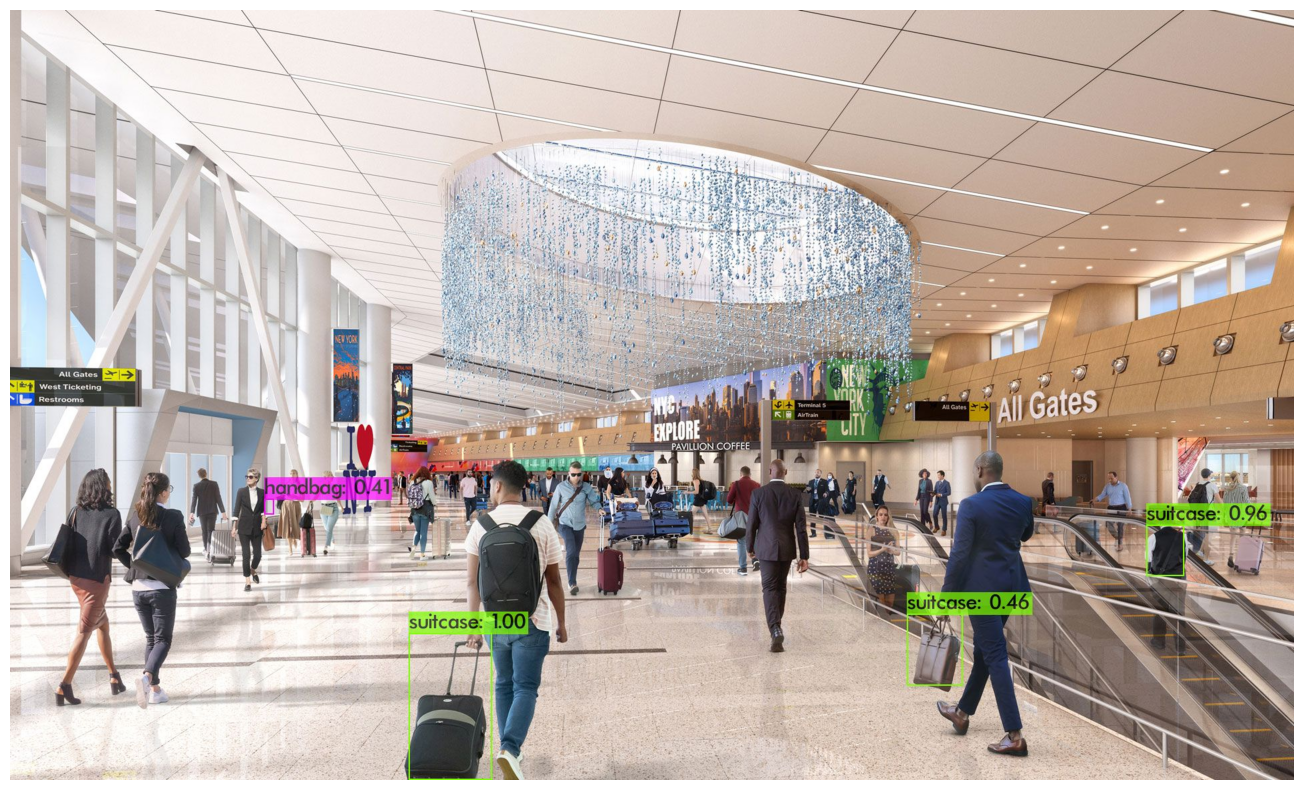

In [ ]:
imShow('predictions.jpg')

In [ ]:
!./darknet detector demo data/obj.data cfg/yolov3_custom.cfg /mydrive/bag_detec/backup/yolov3_custom_final.weights -dont_show /mydrive/bag_detec/video3.mp4 -out_filename output.mp4

 CUDA-version: 12020 (12020), cuDNN: 8.9.6, GPU count: 1  
 OpenCV version: 4.5.4
Demo
 0 : compute_capability = 700, cudnn_half = 0, GPU: Tesla V100-SXM2-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 1, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Sho